In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 5.5 MB/s eta 0:00:00


**Load Data**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

#load dataset
df = pd.read_csv('/content/drive/MyDrive/uber.csv')

**EDA**

In [3]:
df.dtypes
#Only key & pickup_datetime column are categorical columns, rest all are numerical columns.
#Unnamed, passenger_count : int datatype
#rest all remaining columns are float datatype

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [6]:
#shape, size
print(df.shape) #rows : 200000 ,cols : 9
print(df.size) #rows x cols : 1800000

(200000, 9)
1800000


In [7]:
df.describe() #of num cols only

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
#1st moment : mean (central tendency)
mean_values = df.mean(numeric_only=True)
print('\nMean (1st moment):\n', mean_values)


Mean (1st moment):
 Unnamed: 0           2.771250e+07
fare_amount          1.135996e+01
pickup_longitude    -7.252764e+01
pickup_latitude      3.993589e+01
dropoff_longitude   -7.252529e+01
dropoff_latitude     3.992389e+01
passenger_count      1.684535e+00
dtype: float64


### Inference from Dataset Means

1. The average fare amount (~11.36) shows that most taxi rides are moderately priced, making them affordable for short urban trips.  

2. The pickup and dropoff coordinates (longitude ≈ -72.5, latitude ≈ 39.9) suggest that rides are concentrated in one metropolitan region, rather than spread across multiple cities.  

3. The average passenger count (~1.68) indicates that most rides involve single riders, with occasional small groups, highlighting individual travel as the dominant pattern.  


In [4]:
var_values = df.var(numeric_only=True)
print('\nVariance (2nd moment): \n', var_values)


Variance (2nd moment): 
 Unnamed: 0           2.564425e+14
fare_amount          9.804517e+01
pickup_longitude     1.308230e+02
pickup_latitude      5.960673e+01
dropoff_longitude    1.720664e+02
dropoff_latitude     4.616970e+01
passenger_count      1.920986e+00
dtype: float64


### Inference from Dataset Variance (2nd Moment)

Variance indicates how widely the features are spread.

- High Variance Features: fare_amount,pickup_latitude, dropoff_latitude
- Moderate/Low Variance Features: pickup_longitude, dropoff_longitude,passenger_count   

In [5]:
std_values = df.std(numeric_only=True)
print('\nSD (2nd moment): \n', std_values)


SD (2nd moment): 
 Unnamed: 0           1.601382e+07
fare_amount          9.901776e+00
pickup_longitude     1.143779e+01
pickup_latitude      7.720539e+00
dropoff_longitude    1.311741e+01
dropoff_latitude     6.794829e+00
passenger_count      1.385997e+00
dtype: float64


### Inference from Dataset Standard Deviation (2nd Moment)

Standard Deviation indicates the spread of values around the mean.

- Higher SD → Lower Peakedness (Platykurtic): pickup_longitude, dropoff_longitude  
- Moderate SD → Mesokurtic: fare_amount, pickup_latitude, dropoff_latitude  
- Lower SD → Higher Peakedness (Leptokurtic): passenger_count  

1. Longitude features (pickup and dropoff) have higher SD, showing wide geographic spread of rides.  

2. Fare amount and latitude features show moderate SD, suggesting diversity in trip costs and pickup/dropoff locations without extreme outliers.  

3. Passenger count has low SD, meaning most rides involve similar numbers of riders (mostly 1–2), with little variation.   


In [9]:
#skewness(symmetry)
skew_values = df.skew(numeric_only=True)
print('\nSkewness (3rd moment): \n', skew_values)


Skewness (3rd moment): 
 Unnamed: 0           -0.001828
fare_amount           4.504847
pickup_longitude     -7.495890
pickup_latitude      62.976856
dropoff_longitude   -71.505102
dropoff_latitude     -8.031012
passenger_count      18.145521
dtype: float64


### Skewness (3rd moment):

fare_amount        (4.504847)  :  rt skew  
pickup_longitude  (-7.495890) :  lt skew  
pickup_latitude   (62.976856)  :  strong rt skew  
dropoff_longitude (-71.505102) :  strong lt skew  
dropoff_latitude  (-8.031012)  :  lt skew  
passenger_count   (18.145521)  :  rt skew  


In [10]:
#4th moment : kurtosis(peakedness)
kurt_values = df.kurtosis(numeric_only=True)
print('\nKurtosis (4th moment): \n', kurt_values)


Kurtosis (4th moment): 
 Unnamed: 0              -1.200247
fare_amount             63.884314
pickup_longitude      1144.027459
pickup_latitude      12869.240503
dropoff_longitude    20078.722920
dropoff_latitude      2981.741917
passenger_count       2456.621809
dtype: float64


### Kurtosis (4th moment)

| Feature          | Value        | Interpretation                     |
|------------------|-------------:|------------------------------------|
| fare_amount      |     63.884   | Leptokurtic = peaked, heavy tails  |
| pickup_longitude |   1144.027   | Platykurtic = flatter than normal  |
| pickup_latitude  |  12869.240   | Platykurtic = very flat            |
| dropoff_longitude|  20078.723   | Platykurtic = extremely flat       |
| dropoff_latitude |   2981.742   | Platykurtic = slightly flat        |
| passenger_count  |   2456.622   | Mesokurtic = close to normal       |


In [3]:
#rename column name 'Unnamed: 0' to 'ids'
df = df.rename(columns={'Unnamed: 0': 'ids'})

Distribution of target column

<Axes: xlabel='fare_amount', ylabel='Count'>

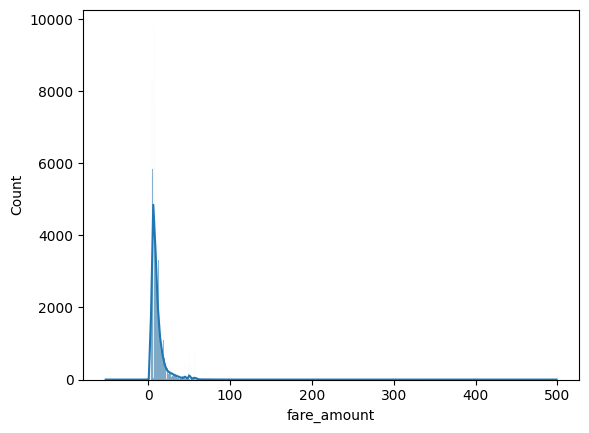

In [4]:
sns.histplot(df.fare_amount, kde = True)  #target column 'fare_amount' is right skewed

1. Most fares are clustered at the lower end (near zero).

2. A smaller number of rides have very high fares, creating a long tail to the right.

**Handling missing values**

In [4]:
#check missing values
print('missing values:\n',df.isnull().sum())

missing values:
 ids                  0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Only 2 columns namely 'dropoff_longitude' & 'dropoff_latitude' contains 1 missing values each so remove them.

In [23]:
# Drop rows with missing values
df.dropna(inplace=True)

#now no missing values are present
print('missing values:\n',df.isnull().sum())

missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [6]:
print('after removing missing values:', df.shape)

after removing missing values: (199999, 9)


**Handling duplicate values**

In [7]:
#removing duplicates
df.drop_duplicates(inplace=True)
print('after removing duplicates:', df.shape)
#no duplicates present

after removing duplicates: (199999, 9)


**Outlier Treatment**

<Axes: ylabel='fare_amount'>

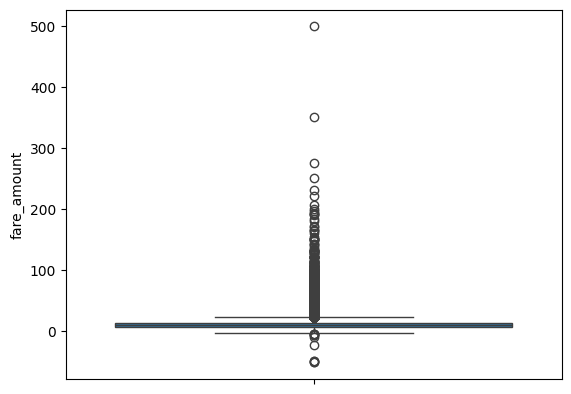

In [15]:
sns.boxplot(df.fare_amount) #outliers are present

<Axes: ylabel='fare_amount'>

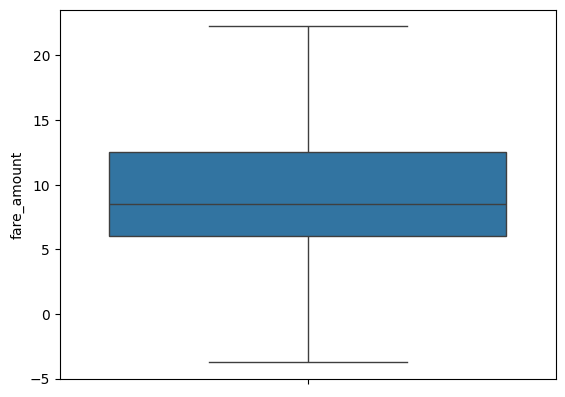

In [24]:
#winsorization
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['fare_amount']
    )

df = winsor.fit_transform(df)
sns.boxplot(df.fare_amount)

<Axes: ylabel='pickup_longitude'>

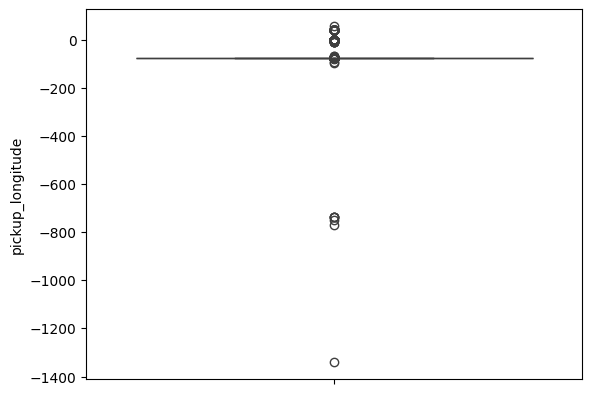

In [11]:
sns.boxplot(df.pickup_longitude)

<Axes: ylabel='pickup_longitude'>

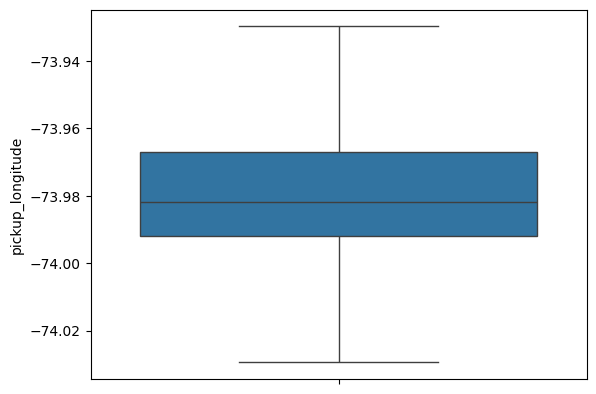

In [25]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['pickup_longitude']
    )

df = winsor.fit_transform(df)
sns.boxplot(df.pickup_longitude)

<Axes: ylabel='pickup_latitude'>

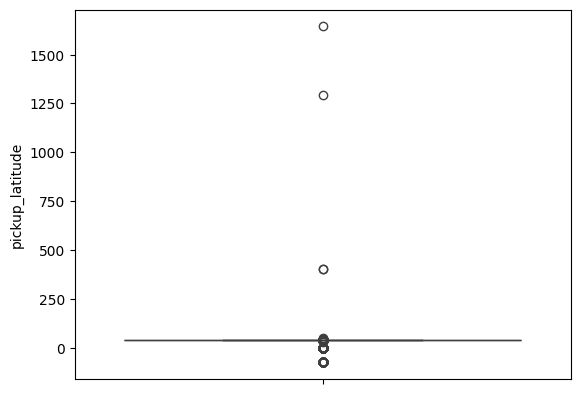

In [13]:
sns.boxplot(df.pickup_latitude)

<Axes: ylabel='pickup_latitude'>

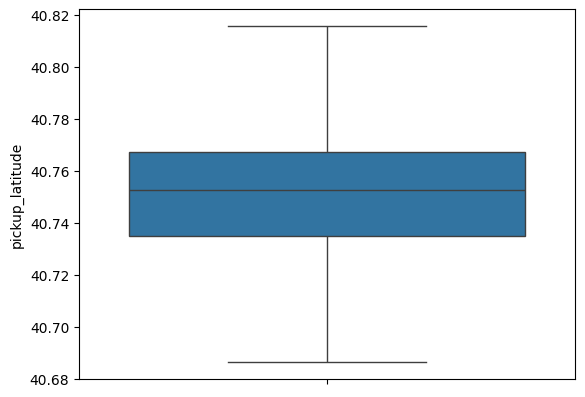

In [26]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['pickup_latitude']
    )

df = winsor.fit_transform(df)
sns.boxplot(df.pickup_latitude)

<Axes: ylabel='dropoff_longitude'>

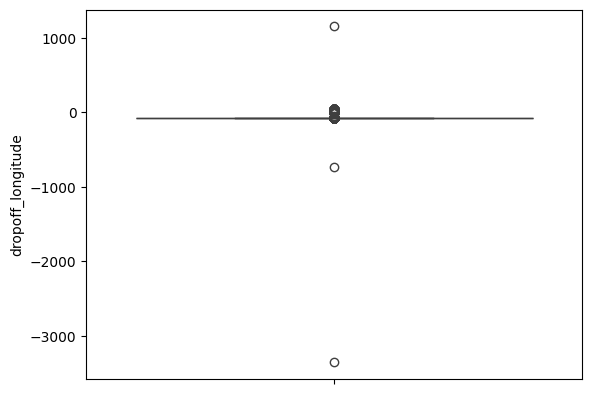

In [15]:
sns.boxplot(df.dropoff_longitude)

<Axes: ylabel='dropoff_longitude'>

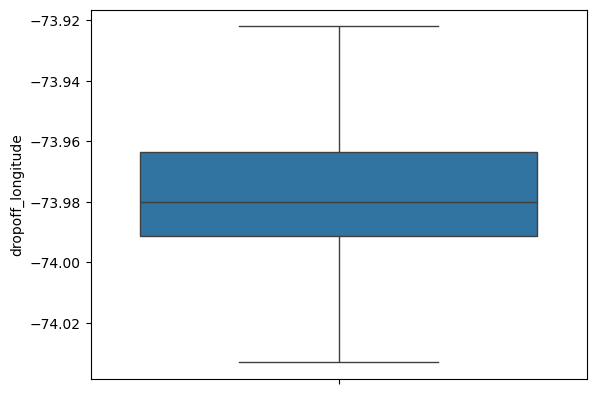

In [27]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['dropoff_longitude']
    )

df = winsor.fit_transform(df)
sns.boxplot(df.dropoff_longitude)

<Axes: ylabel='dropoff_latitude'>

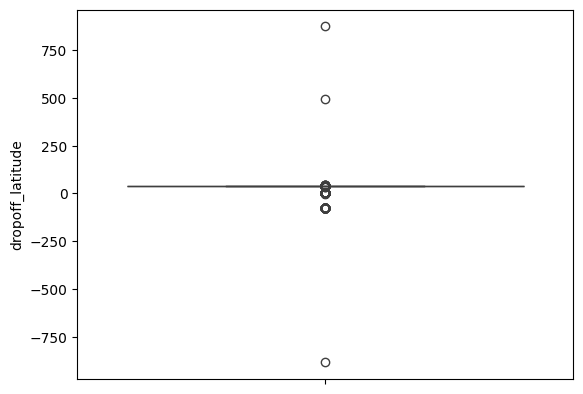

In [21]:
sns.boxplot(df.dropoff_latitude)

<Axes: ylabel='dropoff_latitude'>

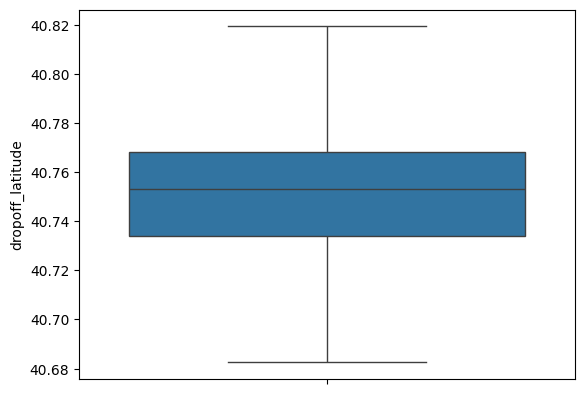

In [28]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=['dropoff_latitude']
    )

df = winsor.fit_transform(df)
sns.boxplot(df.dropoff_latitude)

In [13]:
# Value counts (frequency of each unique value)
df['passenger_count'].value_counts()

,count
passenger_count,
1,138425
2,29428
5,14009
3,8881
4,4276
6,4271
0,708
208,1


In [29]:
#remove invalid extreme outlier (208 passengers)
df = df[df['passenger_count'] != 208]

#replace 0 passengers with 1
df['passenger_count'] = df['passenger_count'].replace(0, 1)

#check unique values after cleaning
print(df['passenger_count'].value_counts())

passenger_count
1    139133
2     29428
5     14009
3      8881
4      4276
6      4271
Name: count, dtype: int64


In [30]:
df.shape

(199998, 9)

**Feature Engineering**

In [31]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

#TIME FEATURES
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek   # 0=Mon, 6=Sun
df['month'] = df['pickup_datetime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

# Categorize time of day
df['time_of_day'] = pd.cut(df['hour'],
                           bins=[0,6,12,18,24],
                           labels=['Night','Morning','Afternoon','Evening'],
                           right=False)

#DISTANCE FEATURES
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

#Distance categories
df['distance_category'] = pd.cut(df['distance_km'],
                                 bins=[0,2,10,50,200],
                                 labels=['Very Short','Short','Medium','Long'])

#PASSENGER FEATURES
df['fare_per_passenger'] = df['fare_amount'] / df['passenger_count']

#INTERACTION FEATURES
df['rush_hour_long_trip'] = ((df['hour'].isin([7,8,9,16,17,18])) & (df['distance_km'] > 10)).astype(int)

In [130]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,is_weekend,time_of_day,distance_km,distance_category,fare_per_passenger,rush_hour_long_trip
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,0,Evening,1.683323,Very Short,7.500000,0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,0,Evening,2.457590,Short,7.700000,0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,0,Evening,5.036377,Short,12.900000,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,0,Morning,1.661683,Very Short,1.766667,0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.929788,40.744085,-73.973082,40.761247,5,17,3,8,0,Afternoon,4.115989,Short,3.200000,0


In [131]:
df.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32


**Skewness Treatment**

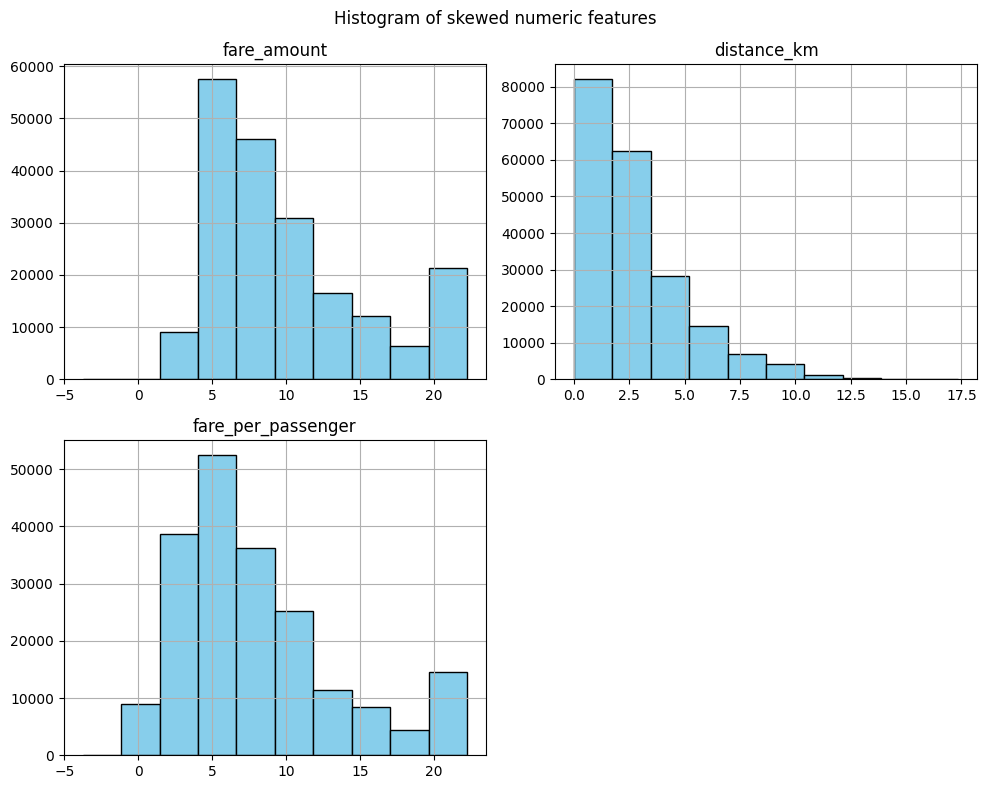

In [17]:
# Select only the numeric columns to check skewness
cols_to_check = ['fare_amount', 'distance_km', 'fare_per_passenger']

df[cols_to_check].hist(figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of skewed numeric features')
plt.tight_layout()
plt.show()

In [139]:
skew_values = df[cols_to_check].skew(numeric_only=True)
print('\nSkewness (3rd moment): \n', skew_values)


Skewness (3rd moment): 
 fare_amount           1.019546
distance_km           1.588848
fare_per_passenger    1.124827
dtype: float64


All columns are right skewed so apply log transformation

In [18]:
#apply log transformation
cols_to_transform = ['fare_amount', 'distance_km', 'fare_per_passenger']

for col in cols_to_transform:
    df[col] = np.log1p(df[col])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
#after log transformation
print(df[cols_to_transform].skew())

fare_amount           0.292744
distance_km           0.348865
fare_per_passenger   -0.151907
dtype: float64


Values between -0.5 to 0.5 : Approx. symmetric

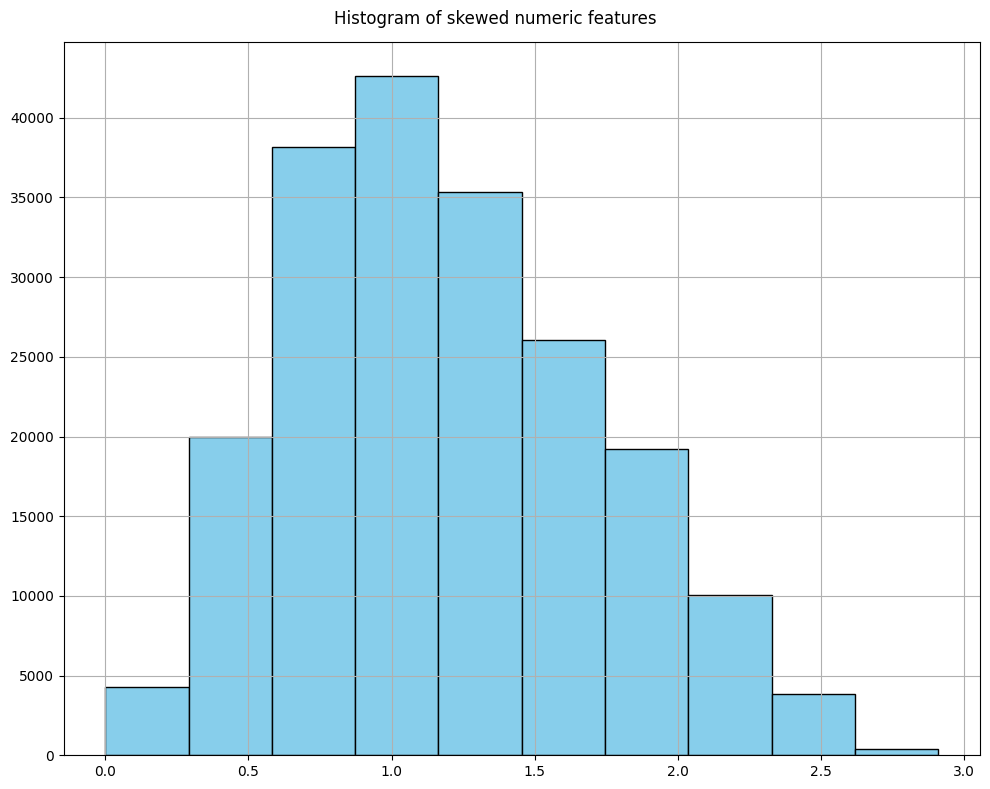

In [142]:
df['distance_km'].hist(figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of skewed numeric features')
plt.tight_layout()
plt.show()

**Data Scaling/Normalization**

In [153]:
#Define features & target
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
        'passenger_count','hour','day_of_week','month','distance_km','fare_per_passenger',
        'is_weekend','time_of_day','distance_category','rush_hour_long_trip']]
y = df['fare_amount']

#Separate categorical & numeric features
categorical_features = ['is_weekend','time_of_day','distance_category','rush_hour_long_trip']
numeric_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
                    'passenger_count','hour','day_of_week','month','distance_km','fare_per_passenger']

#Preprocessing
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

**Split the Dataset**

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Correlation Analysis**

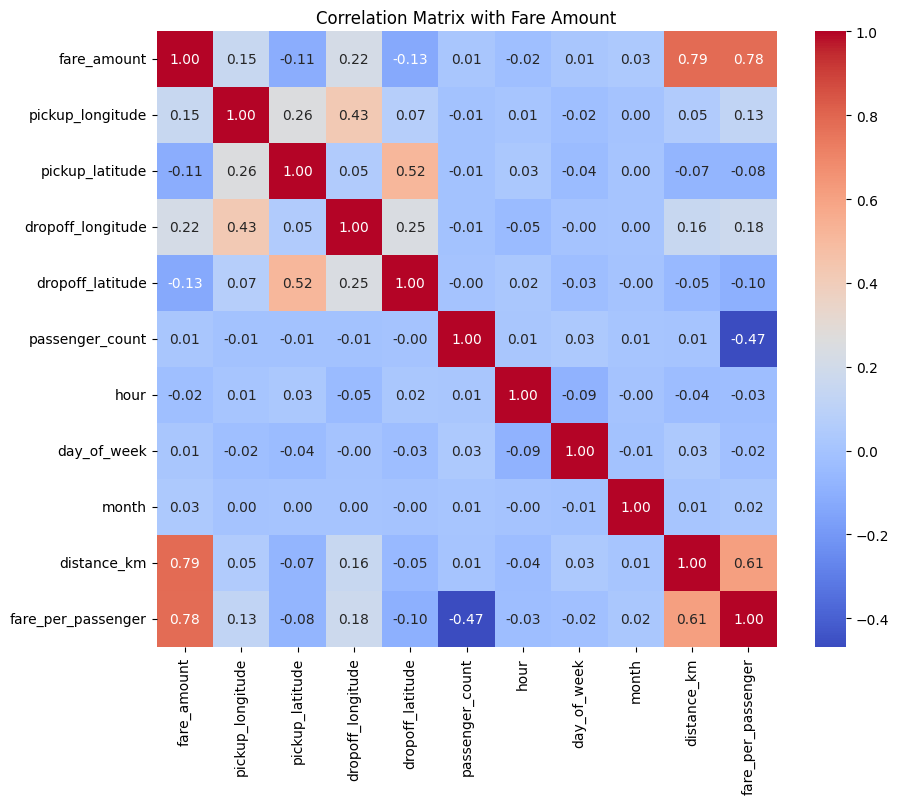

In [30]:
# numeric features + target
numeric_cols = ['fare_amount','pickup_longitude','pickup_latitude',
                'dropoff_longitude','dropoff_latitude','passenger_count',
                'hour','day_of_week','month','distance_km','fare_per_passenger']

# correlation matrix
corr_matrix = df[numeric_cols].corr()

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Fare Amount")
plt.show()

In [31]:
# sorted correlations with target
print(corr_matrix['fare_amount'].sort_values(ascending=False))

fare_amount           1.000000
distance_km           0.786381
fare_per_passenger    0.779578
dropoff_longitude     0.218681
pickup_longitude      0.154056
month                 0.030815
day_of_week           0.013664
passenger_count       0.013150
hour                 -0.023605
pickup_latitude      -0.110856
dropoff_latitude     -0.125874
Name: fare_amount, dtype: float64


Inference :

1. High influence: distance_km, fare_per_passenger

2. Medium influence: dropoff_longitude, pickup_longitude

3. Low influence: month, day_of_week, passenger_count, hour, pickup_latitude, dropoff_latitude

**Save the preprocessed dataframe as CSV file**

In [ ]:
df_encoded.to_csv("preprocessed_uber.csv", index=False)